# Clustering
___

In this notebook, we will run clustering analysis on specific features associated with CPI. The selected features are the top three most significant variables identified in the linear regression model presented in the data collection notebook.

In [12]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
import geopandas as gpd

In [13]:
df = pd.read_csv('../datasets/1860_no_null.csv')

In [14]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df = df.set_index('country')
df.head()

,iso,year,CPI,trade_balance_perc_of_gdp,life_expectancy,journos_imprisoned_yearly,inflation_annual_perc,gini_index,democracy_index,childmor_0_5_per_1000,...,linguistic_div_index,religious_div_index,rural_population_ratio,unemployment_perc_tot_labor,pop_percent_with_sanitation,undernourishment_prevalence_perc,population,gdp_per_capita_2017dollar,fertility_rate,electricity_access
country,,,,,,,,,,,,,,,,,,,,,
Finland,FIN,2006,96.0,4.160,79.6,86.1,0.921,28.0,92.5,3.64,...,0.1412,0.2531,16.963,7.72,99.448135,2.5,5266249.0,46412.200,1.84,100.0
Iceland,ISL,2006,96.0,-16.700,81.7,79.6,8.620,30.3,97.1,3.07,...,0.0820,0.1913,6.841,2.83,98.790146,2.5,304086.0,49956.848,2.09,100.0
New Zealand,NZL,2006,96.0,-0.386,80.0,87.5,2.690,32.5,90.1,6.46,...,0.1657,0.8110,13.600,3.86,100.000000,2.5,4179986.0,37828.188,2.09,100.0
Denmark,DNK,2006,95.0,4.090,78.5,87.8,2.080,25.9,95.2,4.65,...,0.1049,0.2333,13.902,3.90,99.597240,2.5,5457863.0,53322.290,1.85,100.0
Sweden,SWE,2006,92.0,6.780,81.1,91.3,1.760,26.4,98.8,3.45,...,0.1968,0.2342,15.570,7.07,99.063050,2.5,9104724.0,47292.312,1.87,100.0


Because we have collected data on the same counties multiple times due to the variation in years, we will focus solely on the most recent year instead of considering all data values. This approach enhances data analysis by preventing numerous instances of countries clustering with themselves based on the year, which would not provide meaningful insights. Furthermore, this method improves interpretability as it reduces the clutter in the scatter plot, ensuring that each country is represented only once.

In [15]:
gf = df[df['year'] == 2020].reset_index(drop=True)
gf.shape

(114, 31)

<ipython-input-23-d95a3b2a409f>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


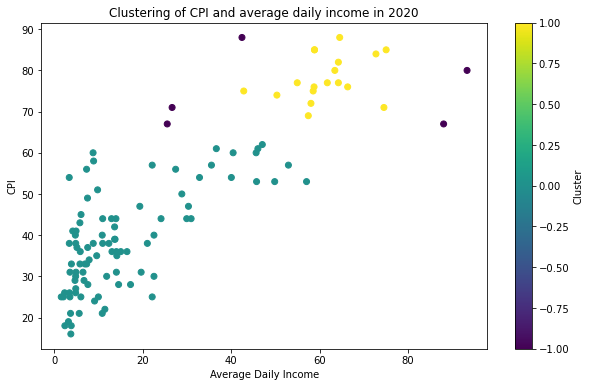

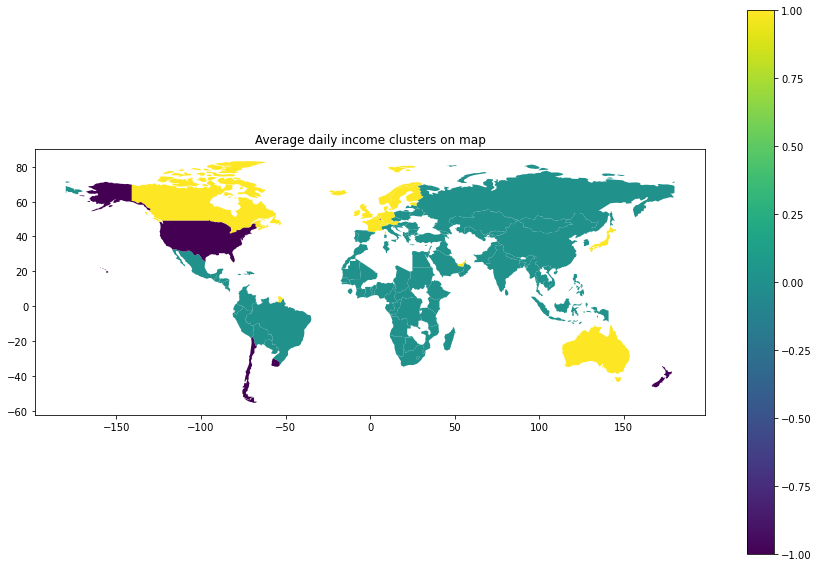

In [23]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_df = pd.merge(gf, world[['iso_a3', 'geometry']], left_on='iso', right_on='iso_a3', how='left')

X = merged_df[['CPI', 'avrg_daily_income']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

merged_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
scatter = plt.scatter(gf['avrg_daily_income'], merged_df['CPI'], c=merged_df['Cluster'], cmap='viridis')
plt.title('Clustering of CPI and average daily income in 2020')
plt.xlabel('Average Daily Income')
plt.ylabel('CPI')
plt.colorbar(scatter, label='Cluster')
plt.savefig('../images/03_1_scatter.png')
plt.show()

gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')

fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(column='Cluster', cmap='viridis', legend=True, ax=ax)
plt.title('Average daily income clusters on map')
plt.savefig('../images/03_2_map.png')
plt.show()

<ipython-input-26-97c89092d9d1>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


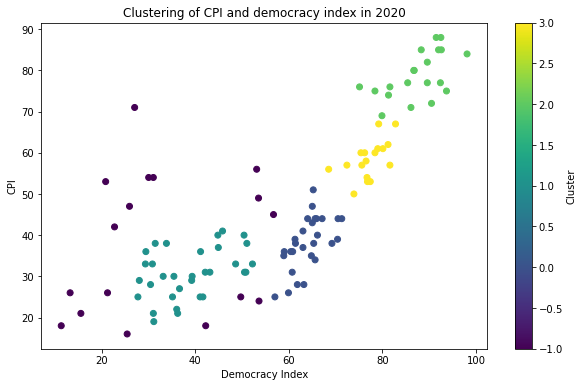

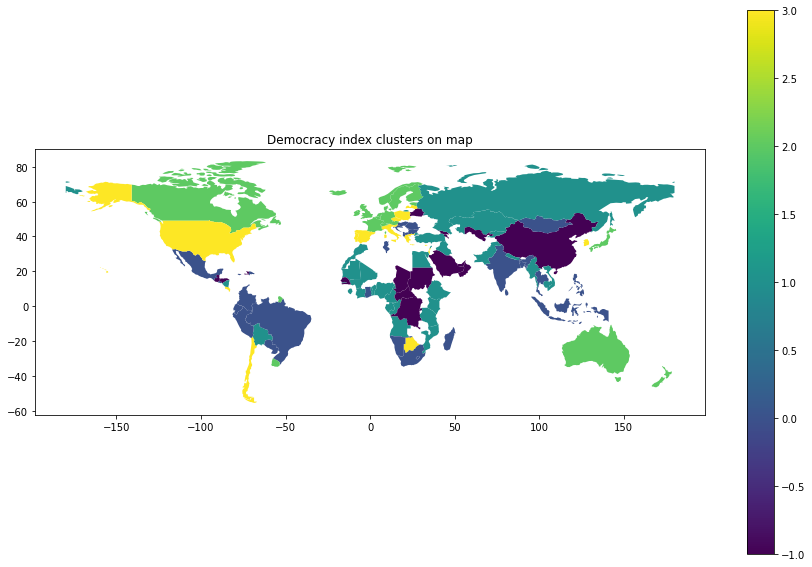

In [26]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_df = pd.merge(gf, world[['iso_a3', 'geometry']], left_on='iso', right_on='iso_a3', how='left')

X = merged_df[['CPI', 'democracy_index']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

merged_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
scatter = plt.scatter(gf['democracy_index'], merged_df['CPI'], c=merged_df['Cluster'], cmap='viridis')
plt.title('Clustering of CPI and democracy index in 2020')
plt.xlabel('Democracy Index')
plt.ylabel('CPI')
plt.colorbar(scatter, label='Cluster')
plt.savefig('../images/03_3_scatter.png')
plt.show()

gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')

fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(column='Cluster', cmap='viridis', legend=True, ax=ax)
plt.title('Democracy index clusters on map')
plt.savefig('../images/03_4_map.png')
plt.show()

<ipython-input-27-4d3911c9170f>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


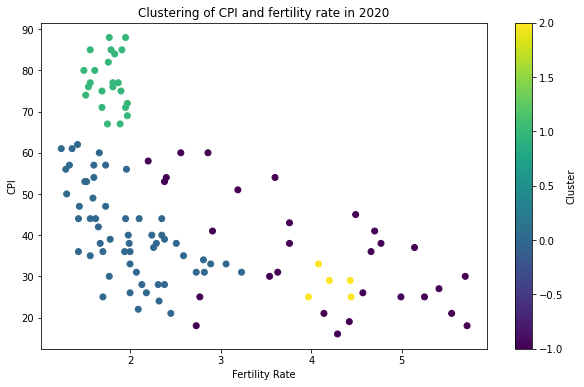

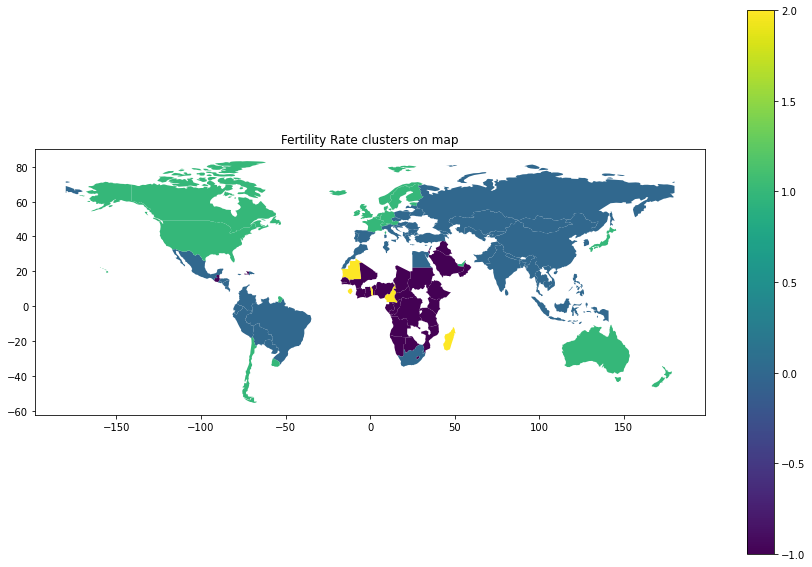

In [27]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_df = pd.merge(gf, world[['iso_a3', 'geometry']], left_on='iso', right_on='iso_a3', how='left')

X = merged_df[['CPI', 'fertility_rate']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

merged_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
scatter = plt.scatter(gf['fertility_rate'], merged_df['CPI'], c=merged_df['Cluster'], cmap='viridis')
plt.title('Clustering of CPI and fertility rate in 2020')
plt.xlabel('Fertility Rate')
plt.ylabel('CPI')
plt.colorbar(scatter, label='Cluster')
plt.savefig('../images/03_5_scatter.png')
plt.show()

gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')

fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(column='Cluster', cmap='viridis', legend=True, ax=ax)
plt.title('Fertility Rate clusters on map')
plt.savefig('../images/03_6_map.png')
plt.show()

Next, I ran a high dimensional clustering on every numerical feature except our target variable, CPI. The optimal cluster was just one and the silhouette score was only 0.07 so this was not very helpful. 

In [24]:
X = df.drop(columns=['CPI', 'iso'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 20]

best_silhouette_score = -1
best_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)
        if len(set(clusters)) <= 1:
            continue
        silhouette_avg = silhouette_score(X_scaled, clusters)
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_params = {'eps': eps, 'min_samples': min_samples}

best_dbscan = DBSCAN(**best_params)
clusters = best_dbscan.fit_predict(X_scaled)

df['Cluster'] = clusters

num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Number of clusters: {num_clusters}")
print("Best Hyperparameters:", best_params)
print("Best Silhouette Score:", best_silhouette_score)

Number of clusters: 1
Best Hyperparameters: {'eps': 1.0, 'min_samples': 10}
Best Silhouette Score: 0.07117960821624456


## Key Takeaways

We can observe from the cluster map of average daily income that there are fewer categories compared to the other two features. This is particularly interesting considering that all clusterings here had the same parameters. It suggests there is not much variation between countries with similar incomes. In contrast, the maps for the other two features show countries in the same cluster are usually contiguous or at least near other countries of the same cluster geographically, such as Scandinavia, Northern Europe, the Balkans, Asia Minor, etc.

In the context of these features being significant in the linear regression model for predicting CPI, we can infer that corruption might be a regional phenomenon. Countries prone to corruption form separate yet homogeneous clusters. Put differently, if a country exhibits high/low corruption, its immediate neighbors are more likely to have high/low corruption as well.